Подгражуем библеотеки

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings

Подгружаем датасет

In [3]:
data= pd.read_csv('D:\ML\data\kc_house_data.csv')

Рассмотрим основную информацию о нашем датасете

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Проведём предобработку данных:

Для начала, так как мы оцениваем стоимость, то дата нас не итересует и столбец с ней можно убрать, столбец id также можно убрать, ровно как длину, широту и почтовый индекс. Столбцы "bedrooms"  и "floors" перевести в int, поскольку ванные комнаты дробными быть не могут то округлим их значения. Поскольку наличие добной части в столбце "floors" говорит о наличии неполного этажа (или чердака), то вынесем его наличие в отдельный столбец. Столбец "price" также преобразуемм в int

In [12]:
data['bathrooms']=data['bathrooms'].astype(int)
data['price']=data['price'].astype(int)

In [13]:
data['floors'].unique()

array([1, 2, 3])

In [14]:
data.pop('date')
data.pop('id')
data.pop('lat')
data.pop('long')
data.pop('zipcode')

KeyError: 'date'

In [15]:
data['cherdak']=(data['floors']%1*2).astype(int)
data['floors']=data['floors'].astype(int)

Поработаем с дубликатами

In [16]:
data.duplicated().sum()

0

In [17]:
data=data.drop_duplicates()

Перейдём к анализу данных и исключению выбросов

In [19]:
data.isnull().sum().sum ()

0

Как основные параметры возьмём:  price, sqft_livinf, sqft_lot, condition, bedrooms

In [20]:
col=['price','sqft_living','sqft_lot','condition', 'bedrooms']

In [21]:
data.describe()[col]

,price,sqft_living,sqft_lot,condition,bedrooms
count,2.160700e+04,21607.000000,2.160700e+04,21607.000000,21607.000000
mean,5.401067e+05,2079.954783,1.511019e+04,3.409497,3.370852
std,3.671710e+05,918.526856,4.142579e+04,0.650791,0.930058
min,7.500000e+04,290.000000,5.200000e+02,1.000000,0.000000
25%,3.217250e+05,1428.500000,5.040000e+03,3.000000,3.000000
50%,4.500000e+05,1910.000000,7.620000e+03,3.000000,3.000000
75%,6.450000e+05,2550.000000,1.069200e+04,4.000000,4.000000
max,7.700000e+06,13540.000000,1.651359e+06,5.000000,33.000000


Гистограммы по параметрам:

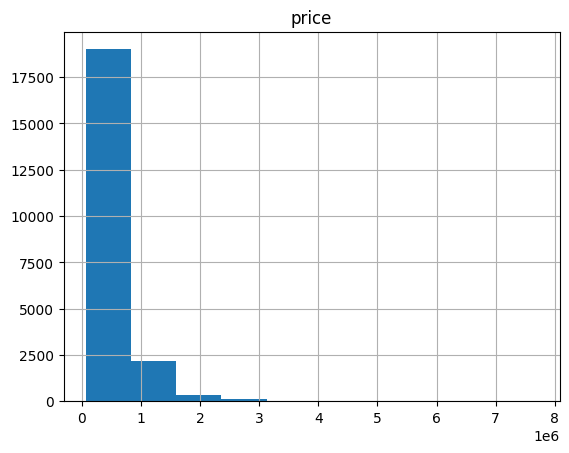

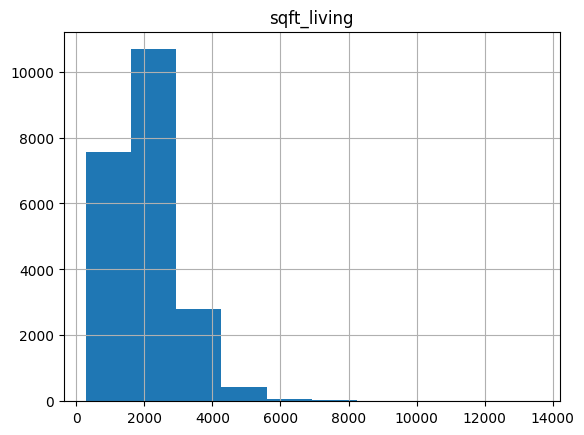

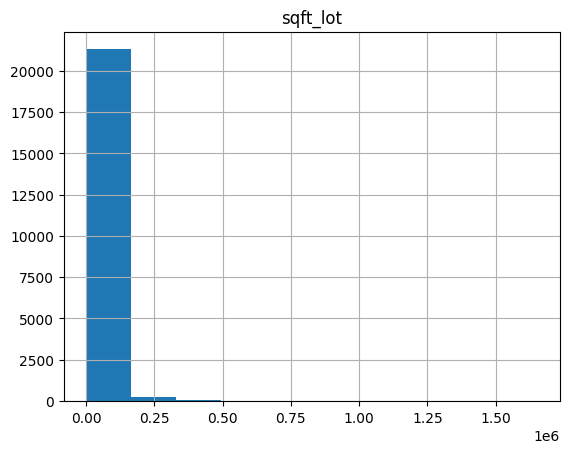

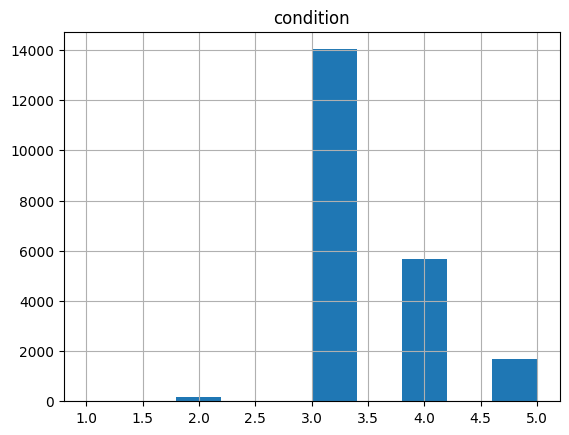

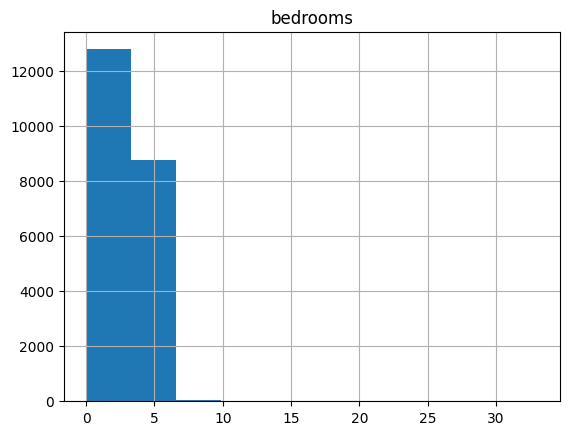

In [22]:
for column in col:
    data.hist(column)

Наличие выбросов очевидно, как в этих колонках, так и в остальных.
Удалим выбросы во всех колонках где они могут быть а именно:
price, sqft_livinf, sqft_lot, condition, bedrooms, bathrooms, sqft_above, sqft_living15,	sqft_lot15

In [24]:
outlier = data[['price', 'sqft_living', 'sqft_lot', 'condition', 'bedrooms','bathrooms','sqft_above','sqft_living15','sqft_lot15']]
Q1 = outlier.quantile(0.1)
Q3 = outlier.quantile(0.9)
IQR = Q3-Q1
df = outlier[~((outlier < (Q1 - 1.5 * IQR)) |(outlier > (Q3 + 1.5 * IQR))).any(axis=1)]
df.describe()

,price,sqft_living,sqft_lot,condition,bedrooms,bathrooms,sqft_above,sqft_living15,sqft_lot15
count,1.944300e+04,19443.000000,19443.000000,19443.000000,19443.000000,19443.000000,19443.000000,19443.000000,19443.000000
mean,5.017085e+05,1980.460371,7780.218896,3.414236,3.338734,1.703492,1699.460114,1915.648665,7507.703338
std,2.656303e+05,794.690226,4444.300519,0.646568,0.883710,0.683909,725.797335,629.082146,3793.634537
min,8.000000e+04,370.000000,520.000000,2.000000,0.000000,0.000000,370.000000,460.000000,651.000000
25%,3.150000e+05,1390.000000,4960.000000,3.000000,3.000000,1.000000,1170.000000,1460.000000,5000.000000
50%,4.380000e+05,1850.000000,7231.000000,3.000000,3.000000,2.000000,1510.000000,1780.000000,7313.000000
75%,6.190000e+05,2433.000000,9600.000000,4.000000,4.000000,2.000000,2090.000000,2260.000000,9272.000000
max,1.755000e+06,6160.000000,32010.000000,5.000000,7.000000,5.000000,5550.000000,5200.000000,26572.000000


In [16]:
index_list = list(df.index.values)
df = data[data.index.isin(index_list)]

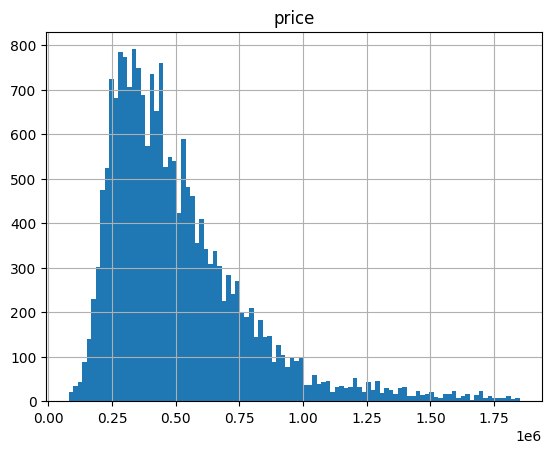

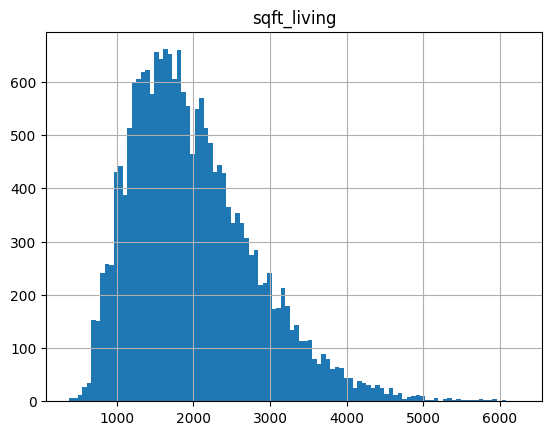

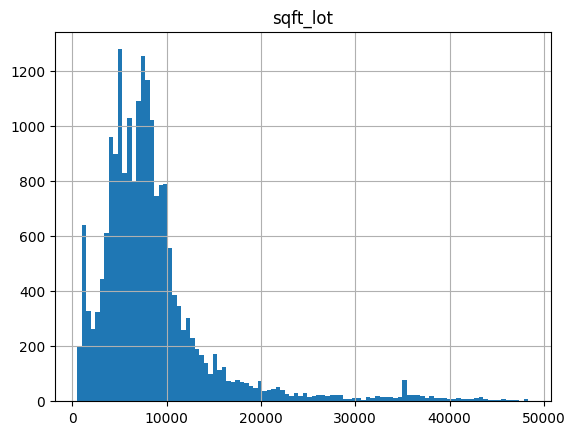

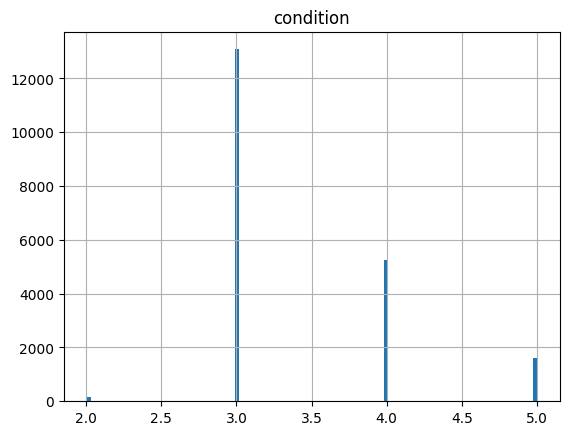

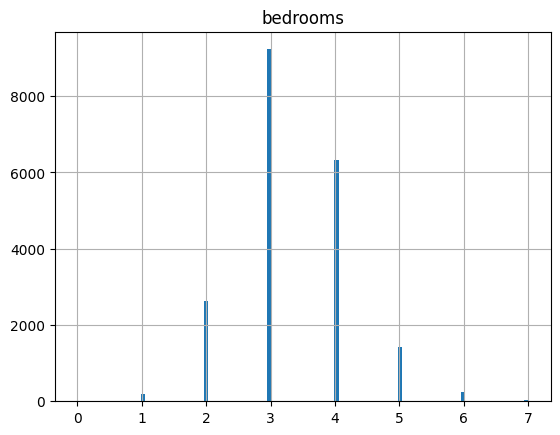

In [17]:
for column in col:
    df.hist(column,bins=100)

Выбросы устранены

Посмотрим некоторые зависимости

D:\ML\venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
D:\ML\venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
D:\ML\venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
D:\ML\venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


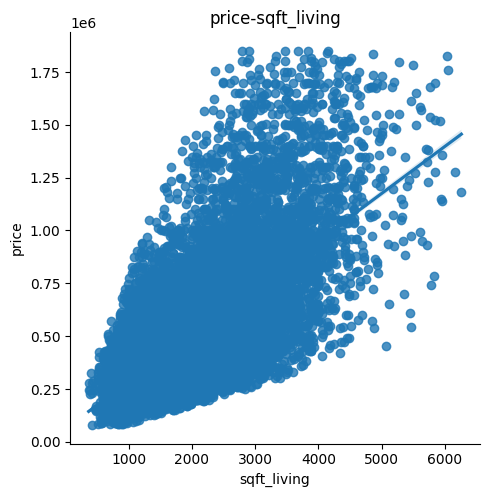

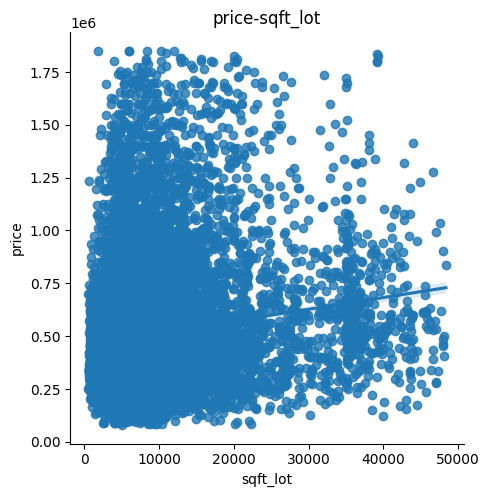

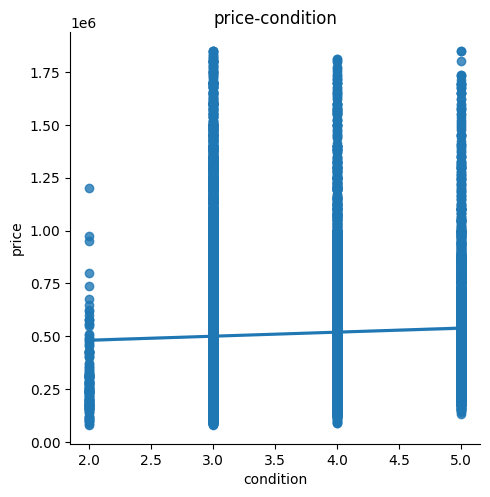

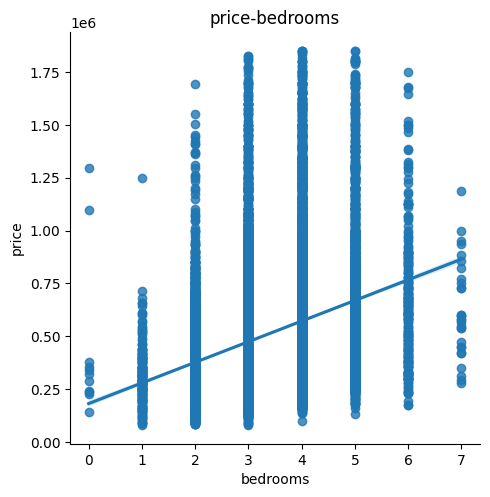

In [18]:
for i in ['sqft_living','sqft_lot','condition', 'bedrooms']:
    sns.lmplot(x=i, y="price", data=df)
    plt.title('price-'+i)

наибольшая зависимость прослеживается между ценой и жилой площадью, корреляция с состоянием наудивление практически отсутствует, в остальных приведённых гистограммах наблюдается слабая зависисмость

Изобразим боксплоты: цена в зависимости от числа спален и состояния

Text(0.5, 1.0, 'condition-price')

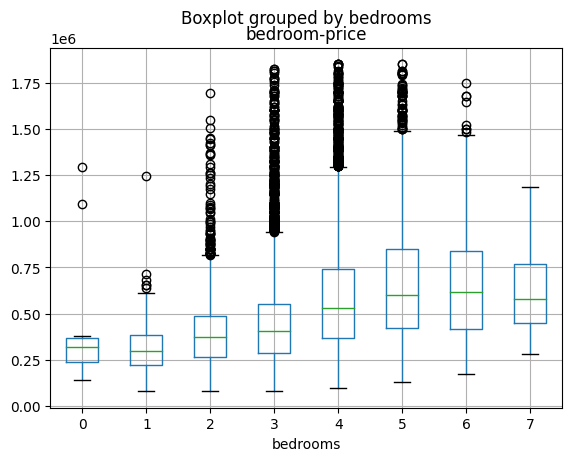

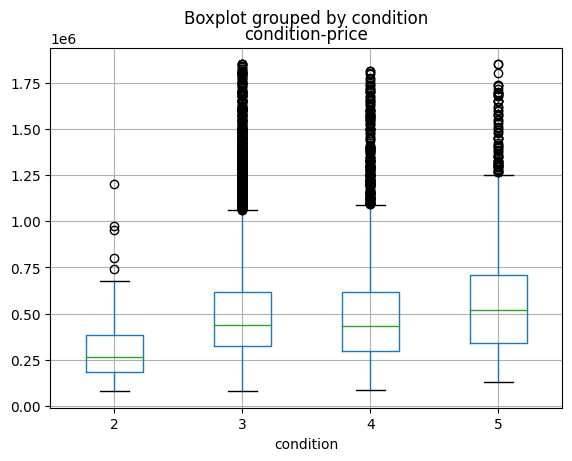

In [19]:
bed = df.query('bedrooms == [0,1,2,3,4,5,6,7]')
bed.boxplot(by ='bedrooms', column ='price', grid = True)
plt.title('bedroom-price')
cond = df.query('condition == [2,3,4,5]')
cond.boxplot(by ='condition', column ='price', grid = True)
plt.title('condition-price')

По большей части цены растут с увеличением этих показателей

Выделим целевой признак и предикторы

In [20]:
y = data["price"]
X = data.drop(["price"], axis=1)

Разделим на обучающую и тестовую выборки

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [22]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((17285, 16), (17285,), (4322, 16), (4322,))

In [23]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

Поработаем с простой регрессией на одном предикторе, в качестве предиктора возьмём площадь жилого пространства

In [24]:
X_train_simple=X_train[['sqft_living']]
X_test_simple=X_test[['sqft_living']]

In [25]:
lr_simple=LinearRegression().fit(X_train_simple,y_train)
y_pred=lr_simple.predict(X_test_simple)

In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from math import sqrt

In [27]:
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred)}')
print(f'R^2: {lr_simple.score(X_test_simple, y_test)}')

MAE: 175005.35498712785
MSE: 69756591437.5876
RMSE: 264114.731580023
MAPE: 0.6037681643213931
R^2: 0.48624727326737516


Как видно из метрик простая линейная регрессия без регулязации крайне не точна

Теперь применем регулязацию, для каждой регулязации необходимо будет подобрать наилучший гиперпараметр, начнём с Ridge

In [28]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [29]:
parameters = {'alpha': np.arange(0, 1, 0.1)}
ridge_optimal = GridSearchCV(Ridge(), parameters).fit(X_train_simple, y_train)
ridge_optimal.best_params_

{'alpha': 0.9}

Применем регулязацию с полученным параметром

In [30]:
y_pred = ridge_optimal.predict(X_test_simple)
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred)}')
print(f'R^2: {ridge_optimal.score(X_test_simple, y_test)}')

MAE: 175005.35498450758
MSE: 69756591437.54971
RMSE: 264114.7315799513
MAPE: 0.603768164318595
R^2: 0.48624727326765427


Показатели улучшились крайне неизначительно  по MAE, по остальным параметром ухудшилось

Повторим тоже самое для Lasso

In [31]:
parameters = {'alpha': np.arange(0, 1, 0.1)}
lasso_optimal = GridSearchCV(Lasso(), parameters).fit(X_train_simple, y_train)
lasso_optimal.best_params_

D:\ML\venv\lib\site-packages\sklearn\base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
D:\ML\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
D:\ML\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.530e+14, tolerance: 1.779e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
D:\ML\venv\lib\site-packages\sk

{'alpha': 0.9}

In [32]:
y_pred = lasso_optimal.predict(X_test_simple)
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred)}')
print(f'R^2: {lasso_optimal.score(X_test_simple, y_test)}')

MAE: 175005.3548258901
MSE: 69756591435.25644
RMSE: 264114.7315756098
MAPE: 0.6037681641492094
R^2: 0.4862472732845441


Показатели лучше чем у Ridge но хуже чем вовсе без регуляризации

Применим ElasticNet по аналогии

In [33]:
parameters = {'alpha':[0.1,1,10,100,1000,10000,100000],'l1_ratio':[0.01,0.1,0.75,0.99,1]}
el_optimal = GridSearchCV(ElasticNet(), parameters).fit(X_train_simple, y_train)
el_optimal.best_params_

{'alpha': 10000, 'l1_ratio': 0.01}

In [34]:
y_pred = el_optimal.predict(X_test_simple)
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {sqrt(mean_absolute_percentage_error(y_test, y_pred))}')
print(f'R^2: {el_optimal.score(X_test_simple, y_test)}')

MAE: 174517.06217070285
MSE: 69758441567.11748
RMSE: 264118.234067846
MAPE: 0.6032507083416547
R^2: 0.48623364718457507


Применение ElasticNet оказало положителный эффект и дало наилучший результат в случае простой регрессии

Теперь применим множественную регрессию, ожидаеся что показатели значительно улучшатся.

In [35]:
lr=LinearRegression().fit(X_train,y_train)
y_pred=lr.predict(X_test)

In [36]:
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred)}')
print(f'R^2: {lr.score(X_test, y_test)}')

MAE: 142491.5443391431
MSE: 50822822213.52598
RMSE: 225439.17630599608
MAPE: 0.5428514503258478
R^2: 0.6256932434004066


Видно что множественная регрессия даже в отсутсвие регулязиции значительно лучше предсказывает чем обыкновенная

Теперь попробуем использовать регулязации подбирая наилучшие параметры в том же порядке как и в прошлый раз

In [37]:
parameters = {'alpha': np.arange(0, 1, 0.1)}
ridge_optimal = GridSearchCV(Ridge(), parameters).fit(X_train, y_train)
print(ridge_optimal.best_params_)

D:\ML\venv\lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=9.76829e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


{'alpha': 0.0}


In [38]:
y_pred = ridge_optimal.predict(X_test)
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred)}')
print(f'R^2: {ridge_optimal.score(X_test, y_test)}')

MAE: 141316.11868551787
MSE: 51606958732.26213
RMSE: 227171.65037095218
MAPE: 0.5400941458962802
R^2: 0.6199181293025258


Использование Ridge по большей части только немного ухудшило ситуацию

In [39]:
parameters = {'alpha': np.arange(0, 1, 0.1)}
lasso_optimal = RandomizedSearchCV(Lasso(max_iter=100), parameters).fit(X_train, y_train)
print(lasso_optimal.best_params_)

D:\ML\venv\lib\site-packages\sklearn\base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
D:\ML\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
D:\ML\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.982e+14, tolerance: 1.779e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
D:\ML\venv\lib\site-packages\sk

{'alpha': 0.9}


D:\ML\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.839e+14, tolerance: 1.831e+11
  model = cd_fast.enet_coordinate_descent(
D:\ML\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.595e+14, tolerance: 2.326e+11
  model = cd_fast.enet_coordinate_descent(


In [40]:
y_pred = lasso_optimal.predict(X_test)
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred)}')
print(f'R^2: {lasso_optimal.score(X_test, y_test)}')

MAE: 142491.63055844136
MSE: 50822747232.24288
RMSE: 225439.0100054622
MAPE: 0.542852046084261
R^2: 0.6256937956326452


Использованние Lasso также скорее негативно сказалось на модели

In [42]:
parameters = {'alpha':[0.1,1,10,100],'l1_ratio':[0.1,0.75,0.99,1]}
el_optimal = RandomizedSearchCV(ElasticNet(), parameters).fit(X_train, y_train)
el_optimal.best_params_

D:\ML\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.162e+14, tolerance: 1.779e+11
  model = cd_fast.enet_coordinate_descent(
D:\ML\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.369e+14, tolerance: 1.894e+11
  model = cd_fast.enet_coordinate_descent(
D:\ML\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.460e+14, tolerance: 1.974e+11
  model = cd_fast.enet_coordi

KeyboardInterrupt: 

In [43]:
y_pred = el_optimal.predict(X_test)
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred)}')
print(f'R^2: {el_optimal.score(X_test, y_test)}')

MAE: 142503.10680893838
MSE: 50815981509.38088
RMSE: 225424.00384471234
MAPE: 0.5429200765694143
R^2: 0.6257436247383545


Применение ElasticNet также привело к ухудшение показателей

Применим полиномиальную регрессию

In [44]:
from sklearn.preprocessing import PolynomialFeatures

In [45]:
p = PolynomialFeatures(2)
X_train_pol=p.fit_transform(X_train)
X_test_pol=p.fit_transform(X_test)

In [46]:
lr=LinearRegression().fit(X_train_pol,y_train)
y_pred=lr.predict(X_test_pol)

In [47]:
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred)}')
print(f'R^2: {lr.score(X_test_pol, y_test)}')

MAE: 128306.41863068294
MSE: 42830532311.0313
RMSE: 206955.38724814897
MAPE: 0.515307702709657
R^2: 0.6845559350202806


Как можно заметить показатели значительно выросли при использовании полиномиальной регресси, теперь попробуем применить регуляризаторы

In [48]:
parameters = {'alpha': np.arange(0, 1, 0.1)}
ridge_optimal = GridSearchCV(Ridge(), parameters).fit(X_train_pol, y_train)
print(ridge_optimal.best_params_)

{'alpha': 0.0}


In [49]:
y_pred=ridge_optimal.predict(X_test_pol)
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred)}')
print(f'R^2: {ridge_optimal.score(X_test_pol, y_test)}')

MAE: 128307.86832083747
MSE: 42794909606.78488
RMSE: 206869.30561778584
MAPE: 0.5153534167837959
R^2: 0.6848182939036926


Все характеристики кроме MAE ухудшились

In [50]:
parameters = {'alpha': np.arange(0, 1, 0.2)}
lasso_optimal = RandomizedSearchCV(Lasso(), parameters).fit(X_train_pol, y_train)
print(lasso_optimal.best_params_)

D:\ML\venv\lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
D:\ML\venv\lib\site-packages\sklearn\base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
D:\ML\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
D:\ML\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.239e+14, tolerance: 1.779e+11 Linear regression models with null w

KeyboardInterrupt: 

In [58]:
y_pred=lasso_optimal.predict(X_test_pol)
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred)}')
print(f'R^2: {lasso_optimal.score(X_test_pol, y_test)}')

D:\ML\venv\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


ValueError: X has 153 features, but Lasso is expecting 16 features as input.

Будем делать пайплайн

In [51]:
from sklearn.pipeline import Pipeline

In [55]:
pipe = Pipeline( [('polynomial',p),('model',lr)])
pipe

Pipeline(steps=[('polynomial', PolynomialFeatures()),
                ('model', LinearRegression())])

In [86]:
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred)}')
print(f'R^2: {pipe.score(X_test, y_test)}')

MAE: 128306.41863068294
MSE: 42830532311.0313
RMSE: 206955.38724814897
MAPE: 0.26554202847190417
R^2: 0.6845559350202806


Теперь мы имеем пайплайн который сам преобразует данные и применяет линейную регрессию

Протестируем написанные нами вычислители метрик

In [92]:
def metric_MAE(a,b):
    return np.mean(np.abs(a-b))
def metric_MSE(a,b):
    return np.mean((a-b)**2)
def metric_RMSE(a,b):
    return metric_MSE(a,b)**0.5
def metric_MAPE(a,b):
    return np.mean(np.abs((a-b)/a))
def metric_Score(a,b):
    return (1-(np.sum((a-b)**2))/(np.sum((a-np.mean(a))**2)))

In [93]:
print(f'MAE: {metric_MAE(y_test, y_pred)}')
print(f'MSE: {metric_MSE(y_test, y_pred)}')
print(f'RMSE: {metric_RMSE(y_test, y_pred)}')
print(f'MAPE: {metric_MAPE(y_test, y_pred)}')
print(f'R^2: {metric_Score(y_test, y_pred)}')

MAE: 128306.41863068294
MSE: 42830532311.0313
RMSE: 206955.38724814897
MAPE: 0.26554202847190417
R^2: 0.6845559350202806


C теми что вычислялись до этого сходятся

На практике было выяснено что наилучший вариант это полиномиальная регрессия без регуляризатора